# Regresión (con pandas y pyplot)

In [ ]:
import csv  # moculo para leer diferentes formatos de archivos, entre ellos separados por ',' comas
            # como analista de datos te enfrentaras a muchos tipos de formatos, separados por ';', '|', tabuladores 
            # y lo que se le acurre a cada quien, siempre presta atencion a ello 
import pandas as pd  # recuerdas que puedes usar los alias que quieras para las librerias ? es costumbre llamara 'pd' a pandas
import numpy as np   # una genial implementacion de algebra lineal 
import matplotlib.pyplot as plt  # tambien es costumbre llamar 'plt' a el modulo 'pyplot' de 'matplotlib'

Aprovechando que estamos familiarizadas con el conjunto de datos de ciudades y sus temperaturas veamos si existe una __relación
lineal__ entre las coordenadas, individualmente, con la temperatura

In [ ]:
cities = pd.read_csv('Cities.csv') # leemos nuestra bendita fuente de informacion
                                   # recuerda: en la vida real, pocas veces tu data set esta completo, limpio y ordenado 

In [ ]:
# Recordemos que siempre es bueno un EDA sencillito 
cities.plot.scatter(x='latitude', y='temperature')
plt.show()

In [ ]:
cities.plot.scatter(x='longitude', y='temperature')
plt.show()

In [ ]:
# Scatter plot de nuestras variables de interes
cities.plot.scatter(x='longitude', y='latitude')
plt.show()

In [ ]:
train = cities # entrenemos con todas las ciudades
train.city.values[0:6] # las primeras 6 ciudades

In [ ]:
plt.scatter(train.latitude, train.temperature, color='lightblue') # elegimos la latitud porque presenta mayor relacion lineal
a,b = np.polyfit(train.latitude, train.temperature, 1) # calculo de los coeficientes ordenada al origen y pendiente 
                                                       # en una sola linea
x1 = min(train.latitude) # definamos los limites de la recta para dibujarla
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='purple')
plt.show() # que opinas ? ajusta bien 


# Clasificación (knn, árboles y random forest)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #carguemos lo minimo y suficiente
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Como la variable original es continua definamos con ella una variable nominal con límites prudentes, en CDMX.

In [ ]:
cats = [] # no por 'gatitos' sino por cat-egoria-s
for i in range(len(cities)):
    if cities.loc[i]['temperature'] < 12:
        cats.append('Frio')
    elif cities.loc[i]['temperature'] < 18:
        cats.append('Casual')
    else: cats.append('El abrazo de Monti')
cities['category'] = cats
print ("Frio:", len(cities[(cities.category == 'Frio')]))
print ("Casual:", len(cities[(cities.category == 'Casual')]))
print ("El abrazo de Monti:", len(cities[(cities.category == 'El abrazo de Monti')]))

Por fin vamos a utilizar nuestro famoso concepto de conjunto *train* y *test*


In [ ]:
numitems = len(cities) #tamanio de muestra
percenttrain = 0.7     # fijemos 70% como entrenamiento
numtrain = int(numitems*percenttrain) #casteo a entero
numtest = numitems - numtrain 
print ('Conjunto de Training con ', numtrain, 'observaciones')
print ('Conjunto de test con ', numtest, 'registros')
citiesTrain = cities[0:numtrain]
citiesTest = cities[numtrain:]

Vamos a entrenar un clasificador con $knn$

In [ ]:
features = ['longitude', 'latitude'] # variables de interes
neighbors = 8 # experimenta cambiando el unico parametro de knn
classifier = KNeighborsClassifier(neighbors) # inicializamos el clasificador
classifier.fit(citiesTrain[features], citiesTrain['category']) # una sola linea hace todos los calculos :D
predictions = classifier.predict(citiesTest[features]) # otra linea hace el ajuste sobre el test
prediccionesCorrectas=[predictions==citiesTest['category'].values] # contemos en cuantas observaciones realizamos la prediccion
                                                                   # correctamente
accuracy= np.sum(prediccionesCorrectas) / len(predictions)         # el calculo del error es una suma y una division :D
'Presición de knn: ' + str(accuracy) + ' con ' + str(neighbors)+  ' vecinos'

En este caso es sencillo, y barato, implementar una búsqueda en *grid*. ¿Dónde se da el mínimo?

In [ ]:
for i in range(numtrain):
    neighbors = i+1
    classifier = KNeighborsClassifier(neighbors) # inicializamos el clasificador
    classifier.fit(citiesTrain[features], citiesTrain['category']) 
    predictions = classifier.predict(citiesTest[features]) 
    prediccionesCorrectas=[predictions==citiesTest['category'].values] 
    accuracy= np.sum(prediccionesCorrectas) / len(predictions)         
    print('Presición de knn: ' + str(accuracy) + ' con ' + str(neighbors+1)+  ' vecinos')

Ahora vamos a entrenar un clasificador con *árboles*

In [ ]:
split = 2 # parametro con el numero minimo de elementos en cada lado del nodo
dt = DecisionTreeClassifier(min_samples_split=split) #  inicializamos el arbol
dt.fit(citiesTrain[features],citiesTrain['category']) # una sola linea hace el ajuste :D 
predictions = dt.predict(citiesTest[features])  # otra linea y tenemos la predicción
prediccionesCorrectas=[predictions==citiesTest['category'].values] #calculamos de nuevo en 2 lineas el error
accuracy= np.sum(prediccionesCorrectas) / len(predictions)
print('Presición : ', accuracy)

Otro caso sencillo para implementar una búsqueda en *grid*. ¿Dónde se da el mínimo?

In [ ]:
for i in range(int(numtrain**.5)):
    split = i+2
    dt = DecisionTreeClassifier(min_samples_split=split) #  inicializamos el arbol
    dt.fit(citiesTrain[features],citiesTrain['category']) # una sola linea hace el ajuste :D 
    predictions = dt.predict(citiesTest[features])  # otra linea y tenemos la predicción
    prediccionesCorrectas=[predictions==citiesTest['category'].values] #calculamos de nuevo en 2 lineas el error
    accuracy= np.sum(prediccionesCorrectas) / len(predictions)
    print('Presición : ' + str(accuracy) +' con ' +str(split) +' elementos en cada nodo')

Ya tenemos un clasificador decente con $knn$ y árboles, ¿lo podremos mejorar con *random forest*?


In [ ]:
trees = 100 #numero de arboles
rf = RandomForestClassifier(n_estimators=trees) # inicializamos el clasificador
rf.fit(citiesTrain[features],citiesTrain['category']) #otra linea que nos libra de cuentas
predictions = rf.predict(citiesTest[features]) # otra linea que se agradece
prediccionesCorrectas=[predictions==citiesTest['category'].values] #de nuevo el error consiste en solo contar :D
accuracy= np.sum(prediccionesCorrectas) / len(predictions)
print('Presición de random forest: ', accuracy)

Finalmente implementamos otra búsqueda en *grid* porque __yolo__ ¿Dónde se da el mínimo?

In [ ]:
for i in range(200):
    trees = i + 1 
    rf = RandomForestClassifier(n_estimators=trees) # inicializamos el clasificador
    rf.fit(citiesTrain[features],citiesTrain['category']) #otra linea que nos libra de cuentas
    predictions = rf.predict(citiesTest[features]) # otra linea que se agradece
    prediccionesCorrectas=[predictions==citiesTest['category'].values] #de nuevo el error consiste en solo contar :D
    accuracy= np.sum(prediccionesCorrectas) / len(predictions)
    print('Presición con Random forest: ' + str(accuracy) + ' con ' + str(trees) +' árboles')

Notas que utilizar muchos árboles no necesariamente disminuye el error de *test* 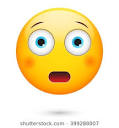 
